In [1]:
import numpy as np
import torch 
import torch.nn as nn
from tqdm import tnrange
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import time
from sklearn.metrics import explained_variance_score


In [2]:
whole = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:25,:50000].flatten()
diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy")[:25*50000].flatten()
base = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:25,:50000].flatten()

In [3]:
sigma_list = np.arange(1,100,2)
T = 1001
t = np.arange(T)
thresh_list = np.arange(0,1,0.02)
mse_list = np.zeros((sigma_list.shape[0], thresh_list.shape[0]))
var_list = np.zeros((sigma_list.shape[0], thresh_list.shape[0]))

for i in tnrange(sigma_list.shape[0]):
    for j in range(thresh_list.shape[0]):
        sigma = sigma_list[i]
        thresh = thresh_list[j]
        kernel = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5 * (t-T//2-1)**2/sigma**2)

        smooth = np.convolve(kernel, whole, mode="same")
        smooth_diff = whole - smooth
        smooth_diff_thresh = np.copy(smooth_diff)
        smooth_diff_thresh[smooth_diff_thresh < thresh] = 0
        thresh_base = whole - smooth_diff_thresh

        mse_list[i,j] = np.mean((smooth_diff_thresh - diff)**2)
        var_list[i,j] = explained_variance_score(diff, smooth_diff_thresh)

<ipython-input-3-79f2264f42b2>:8: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(sigma_list.shape[0]):


0.013570116912849631
(array([17]), array([26]))
35 0.52


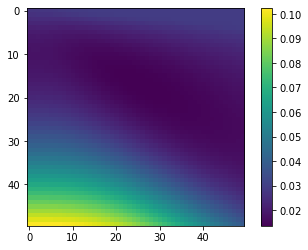

In [4]:
plt.imshow(mse_list)
plt.colorbar()
print(np.min(mse_list))
print(np.where(mse_list == np.min(mse_list)))
print(sigma_list[17], thresh_list[26])

0.5344219707517528
(array([17]), array([26]))
35 0.52


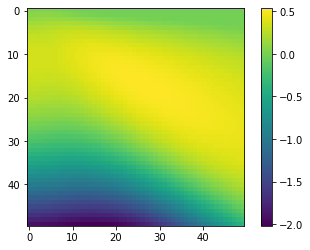

In [6]:
plt.imshow(var_list)
plt.colorbar()
print(np.max(var_list))
print(np.where(var_list == np.max(var_list)))
print(sigma_list[17], thresh_list[26])

In [2]:
whole = np.load("/media/hdd01/sklee/CA1_clust4-60/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000]
diff = np.load("/media/hdd01/sklee/CA1_clust4-60/data/V_diff.npy").reshape(-1,50000)
base = np.load("/media/hdd01/sklee/CA1_clust4-60_noNA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_noDendNa_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")[:,:50000]

In [3]:
sigma = 35
T = 1001
t = np.arange(T)
thresh = 0.5
kernel = 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5 * (t-T//2-1)**2/sigma**2)

In [4]:
smooth = np.zeros((1000,50000))

for i in tnrange(1000):
    smooth[i] = np.convolve(kernel, whole[i], mode="same")

smooth_diff = whole - smooth
smooth_diff_thresh = np.copy(smooth_diff)
smooth_diff_thresh[smooth_diff_thresh < thresh] = 0

<ipython-input-4-e17bd23c093c>:3: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(1000):


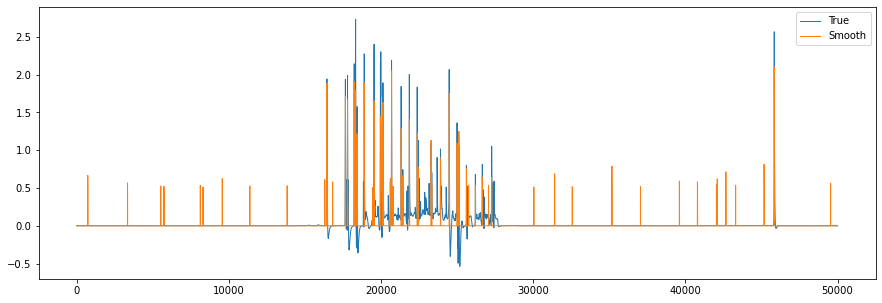

In [5]:
plt.figure(figsize = (15,5))
plt.plot(diff[0], label="True", linewidth=1)
plt.plot(smooth_diff_thresh[0], label="Smooth", linewidth=1)
plt.legend()
#plt.ylim(-1,3)

(-1.0, 3.0)

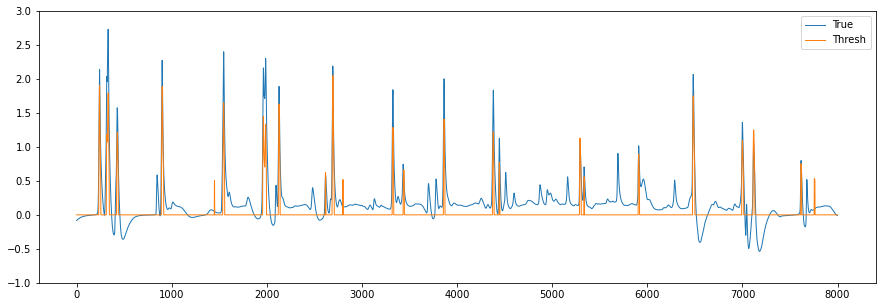

In [6]:
plt.figure(figsize = (15,5))
plt.plot(diff[0][18000:26000], label="True", linewidth=1)
plt.plot(smooth_diff_thresh[0][18000:26000], label="Thresh", linewidth=1)

plt.legend()
plt.ylim(-1,3)

In [7]:
np.save("/media/hdd01/sklee/CA1_clust4-60/V_smooth_diff.npy", smooth_diff_thresh.flatten())